# 독일 V2 로켓과 런던 폭격 - 푸아송 분포 응용

## 푸아송 분포 실습

아래 자료들을 참고하면서 실습을 하였습니다.

* [AN APPLICATION OF THE POISSON DISTRIBUTION](https://www.actuaries.org.uk/system/files/documents/pdf/0481.pdf), by R. D. CLARKE
* [The flying bomb and the actuary - Royal Statistical Society](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1740-9713.2019.01315.x), Wiley

### 실제값

In [1]:
n_squares = 576
n_bombs = 537

# 스퀘어당 떨어진 폭탄 수의 평균
m = n_bombs / n_squares
print(f'{m:.3f}')

0.932


In [2]:
# 스퀘어당 떨어진 폭탄 수
n_bombs_per_square = [0, 1, 2, 3, 4, 5]

# 해당 스퀘어 수 (관찰도수)
observed_num_of_squares = [229, 211, 93, 35, 7, 1]

print(f'# of squares: {sum(observed_num_of_squares)}')

# of squares: 576


### 기댓값

In [3]:
import math

def poisson_distribution(m, k):
    return pow(m, k) / math.factorial(k) * pow(math.e, -m)

# 푸아송 분포에 따른 기대 스퀘어 수 (기대도수)
expected_num_of_squares = [n_squares * poisson_distribution(m, k) for k in n_bombs_per_square]
print([round(v, 2) for v in expected_num_of_squares])

n_expected_squares = sum(expected_num_of_squares)
expected_num_of_squares[-1] += n_squares - n_expected_squares
print([round(v, 2) for v in expected_num_of_squares])

print(f'# of squares: {sum(expected_num_of_squares)}')

[226.74, 211.39, 98.54, 30.62, 7.14, 1.33]
[226.74, 211.39, 98.54, 30.62, 7.14, 1.57]
# of squares: 576.0


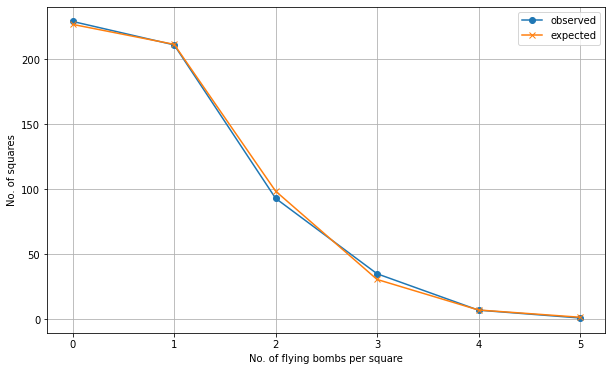

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(n_bombs_per_square, observed_num_of_squares, marker='o', label='observed')
plt.plot(n_bombs_per_square, expected_num_of_squares, marker='x', label='expected')

plt.xlabel('No. of flying bombs per square')
plt.ylabel('No. of squares')
plt.legend()
plt.grid(True)
plt.show()

### 카이제곱(${\chi}^2$) 검정 

다음은 [AN APPLICATION OF THE POISSON DISTRIBUTION](https://www.actuaries.org.uk/system/files/documents/pdf/0481.pdf) 글의 끝 부분을 인용한 것입니다.

```
  The occurrence of clustering would have been reflected in the above table by an excess number of squares containing either a high number of flying bombs or none at all, with a deficiency in the intermediate classes. The closeness of fit which in fact appears lends no support to the clustering hypothesis.
  Applying the x2 test to the comparison of actual with expected figures, we obtain x2 = 1.17. There are 4 degrees of freedom, and the probability of obtaining this or a higher value of x2 is .88.
```

관찰도수가 특정 분포를 따르는지 여부를 검정하는 것이므로 적합도 검정(Goodness-of-fit Test)에 해당합니다.

In [5]:
# 피어슨 카이제곱 통계량
x2 = 0
for o_num, e_num in zip(observed_num_of_squares, expected_num_of_squares):
    item_val = pow(o_num - e_num, 2) / e_num
    x2 += item_val
    print(f'o_num: {o_num:8.4f}, e_num: {e_num:8.4f} => item_val: {item_val:.4f}')
    
print(f'** x2: {round(x2, 2)}')

o_num: 229.0000, e_num: 226.7427 => item_val: 0.0225
o_num: 211.0000, e_num: 211.3904 => item_val: 0.0007
o_num:  93.0000, e_num:  98.5387 => item_val: 0.3113
o_num:  35.0000, e_num:  30.6223 => item_val: 0.6258
o_num:   7.0000, e_num:   7.1372 => item_val: 0.0026
o_num:   1.0000, e_num:   1.5687 => item_val: 0.2062
** x2: 1.17


값의 종류는 6 개이고 관찰값으로부터 파라미터 $m$을 추정하였으므로 자유도 $k$는 다음과 같습니다.

$$
k = (6 - 1) - 1 = 4
$$

[카이제곱 분포표](https://www.oreilly.com/library/view/making-sense-of/9780470074718/appa-sec003.html)에 따르면 자유도가 4이고 유의수준 5%에 해당하는 $\chi^2$ 값은 9.49입니다. 위에서 구한 카이제곱 값이 이보다 작으므로 귀무가설을 채택합니다.
* 귀무가설: 관측도수는 푸아송 분포를 따른다.
* 대립가설: 관측도수는 푸아송 분포를 따르지 않는다.

## 참고

* [큰 수의 법칙](https://namu.wiki/w/%ED%81%B0%20%EC%88%98%EC%9D%98%20%EB%B2%95%EC%B9%99), 나무위키
  > 때문에 책 <이공계의 뇌로 산다>에서 소개된 노벨경제학상 수상자 **대니얼 카너먼**은 우스갯소리로 이러한 불충분한 표본으로 잘못 만들어진 p 값으로 인한 '잘못된 큰 수의 법칙 적용 사례'를 두고 '작은 수의 법칙'이라고 얘기했다고 한다. 즉 실제 있는 법칙은 아니다. 또한 잘못된 p 값 예시로 V2의 런던폭격분포를 예로 들었다.